In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [68]:
def models():
    linear = LinearRegression()
    xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
    rf = RandomForestRegressor(n_estimators=51,min_samples_leaf=5,min_samples_split=3)
    bagg = BaggingRegressor(n_estimators=51,random_state=42)
    extra = ExtraTreesRegressor(n_estimators=51,random_state=42)
    ada = AdaBoostRegressor(n_estimators=51,random_state=42)
    grad = GradientBoostingRegressor(n_estimators=51,random_state=42)
    regressor_list = [linear,xgb_model,rf,bagg,extra,ada,grad]
    regressor_name_list = ['Linear Regression','XGBoost','Random Forests','Bagging','Extra Trees','AdaBoost','Gradient Boost']
    return regressor_list,regressor_name_list
    
def print_evaluation_metrics(trained_model,trained_model_name,X_test,y_test):
    print('--------- Model : ', trained_model_name, ' ---------------\n')
    predicted_values = trained_model.predict(X_test)
    print(metrics.mean_absolute_error(y_test,predicted_values))
    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test,predicted_values))
    print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test,predicted_values))
    print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test,predicted_values)))
    #print('R2_score:', trained_model.score(X_test,y_test))
    print("---------------------------------------\n")
    figure = sns.distplot(y_test['overall_score'], axlabel = 'TripI Score', hist=False, kde=True, 
              color = 'darkblue', kde_kws={'linewidth': 4}, label = "Truth")
    sns.distplot(predicted_values,hist=False, kde=True, 
             color = 'red', kde_kws={'linewidth': 4}, label = "Prediction")
    figure.set_title(trained_model_name)
    plt.show()

In [3]:
rank = pd.read_csv('./Train_11k/rank_11.csv')

In [4]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10969 entries, 0 to 10968
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel_id                        10969 non-null  float64
 1   name                            10969 non-null  object 
 2   address                         10969 non-null  object 
 3   overall_score_OTA               9193 non-null   float64
 4   overall_score                   9687 non-null   float64
 5   counts_search                   10969 non-null  float64
 6   counts_click                    10969 non-null  float64
 7   counts_book                     10969 non-null  float64
 8   province_id                     10969 non-null  float64
 9   district_id                     9183 non-null   float64
 10  latitude                        10955 non-null  float64
 11  longitude                       10955 non-null  float64
 12  description                     

In [5]:
cols = ['tours', 'night_club', 'relax_spa', 'relax_massage', 'relax_steam_room', 'relax_outdoor_room',
        'relax_outdoor_pool', 'relax_sauna', 'relax_pool', 'currency_exchange',
       'room_service_24_hour', 'elevator', 'safely_deposit_boxed',
       'luggage_storage', 'poolside_bar', 'airport_transfer', 'restaurants',
       'concierge', 'shops', 'meeting_facilities', 'baby_sitting',
       'facilities_for_disabled_guests', 'private_beach', 'front_desk_24_hour',
       'bar', 'laundry_service', 'shuttle_room', 'price_mean']

In [6]:
arr = []
new_cols = []
for col in cols:
    x = rank[[col]].shape[0]
    y = rank[rank[col] == -1][col].count()
    percent = 100*y // x
    string = str(percent) + '% not info of ' + col
    arr.append(string)
    
    if percent <= 40:
        new_cols.append(col)
        
arr.sort()
arr

['0% not info of price_mean',
 '100% not info of relax_outdoor_room',
 '100% not info of relax_pool',
 '22% not info of laundry_service',
 '24% not info of luggage_storage',
 '27% not info of tours',
 '29% not info of concierge',
 '31% not info of currency_exchange',
 '32% not info of front_desk_24_hour',
 '33% not info of safely_deposit_boxed',
 '35% not info of bar',
 '39% not info of restaurants',
 '40% not info of relax_spa',
 '46% not info of airport_transfer',
 '46% not info of elevator',
 '46% not info of meeting_facilities',
 '46% not info of private_beach',
 '50% not info of room_service_24_hour',
 '52% not info of relax_massage',
 '60% not info of facilities_for_disabled_guests',
 '62% not info of relax_outdoor_pool',
 '68% not info of relax_steam_room',
 '69% not info of baby_sitting',
 '71% not info of relax_sauna',
 '74% not info of shops',
 '94% not info of poolside_bar',
 '97% not info of night_club',
 '98% not info of shuttle_room']

In [7]:
new_cols

['tours',
 'relax_spa',
 'currency_exchange',
 'safely_deposit_boxed',
 'luggage_storage',
 'restaurants',
 'concierge',
 'front_desk_24_hour',
 'bar',
 'laundry_service',
 'price_mean']

In [8]:
score = rank[['hotel_id','overall_score_OTA', 'overall_score','tours','star_number',
               'relax_spa','currency_exchange','safely_deposit_boxed','luggage_storage','restaurants',
               'concierge','front_desk_24_hour','bar','laundry_service','price_mean','num_reviews']]

In [9]:
score['overall_score_OTA'] = score['overall_score_OTA'].fillna(score['overall_score_OTA'].mean())
score['price_mean'] = score['price_mean'].fillna(score['price_mean'].mean())
score['num_reviews'] = score['num_reviews'].fillna(score['num_reviews'].mean())

<ipython-input-9-9fed186c525e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['overall_score_OTA'] = score['overall_score_OTA'].fillna(score['overall_score_OTA'].mean())
<ipython-input-9-9fed186c525e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['price_mean'] = score['price_mean'].fillna(score['price_mean'].mean())
<ipython-input-9-9fed186c525e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [10]:
df1 = score[-score['overall_score'].isna()]
df = df1.drop(['hotel_id'], axis = 1)

In [11]:
X = df.loc[:, df.columns != 'overall_score']
y = df.loc[:, df.columns == 'overall_score']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
X.head(3)

,overall_score_OTA,tours,star_number,relax_spa,currency_exchange,safely_deposit_boxed,luggage_storage,restaurants,concierge,front_desk_24_hour,bar,laundry_service,price_mean,num_reviews
0,8.300000,1,3,-1,1,1,1,1,1,1,1,1,464286.000000,902.0
1,7.654321,-1,3,-1,-1,-1,-1,-1,-1,1,-1,-1,809083.000000,82.0
2,7.600000,1,2,1,1,1,1,1,1,-1,1,1,606128.142857,62.0


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9687 entries, 0 to 10924
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   overall_score_OTA     9687 non-null   float64
 1   tours                 9687 non-null   int64  
 2   star_number           9687 non-null   int64  
 3   relax_spa             9687 non-null   int64  
 4   currency_exchange     9687 non-null   int64  
 5   safely_deposit_boxed  9687 non-null   int64  
 6   luggage_storage       9687 non-null   int64  
 7   restaurants           9687 non-null   int64  
 8   concierge             9687 non-null   int64  
 9   front_desk_24_hour    9687 non-null   int64  
 10  bar                   9687 non-null   int64  
 11  laundry_service       9687 non-null   int64  
 12  price_mean            9687 non-null   float64
 13  num_reviews           9687 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 1.1 MB


--------- Model :  Linear Regression  ---------------

6.589230306231349
Mean Absolute Error (MAE): 6.589230306231349
Mean Squared Error (MSE): 89.6097386700585
Root Mean Squared Error (RMSE): 9.466242056384282
---------------------------------------



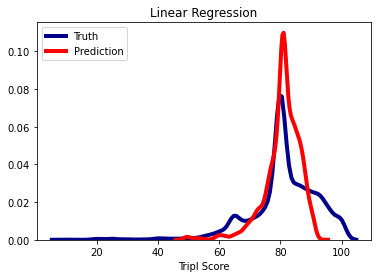

[22:16:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[22:16:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
--------- Model :  XGBoost  ---------------

6.610217743654779
Mean Absolute Error (MAE): 6.610217743654779
Mean Squared Error (MSE): 95.20872327218203
Root Mean Squared Error (RMSE): 9.757495747997128
---------------------------------------



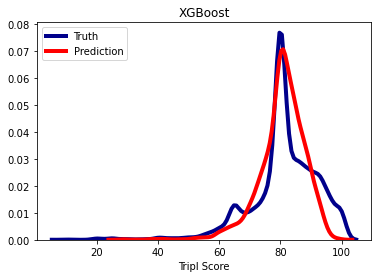

<ipython-input-69-1022a7d8e28d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


--------- Model :  Random Forests  ---------------

6.3250693532878515
Mean Absolute Error (MAE): 6.3250693532878515
Mean Squared Error (MSE): 87.36074983849306
Root Mean Squared Error (RMSE): 9.346697269008613
---------------------------------------



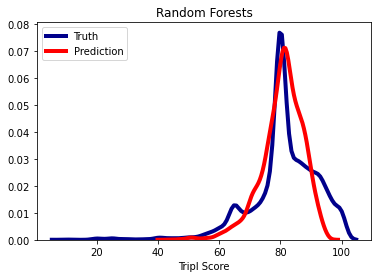

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


--------- Model :  Bagging  ---------------

6.577747600354092
Mean Absolute Error (MAE): 6.577747600354092
Mean Squared Error (MSE): 94.25258559962464
Root Mean Squared Error (RMSE): 9.708377083716137
---------------------------------------



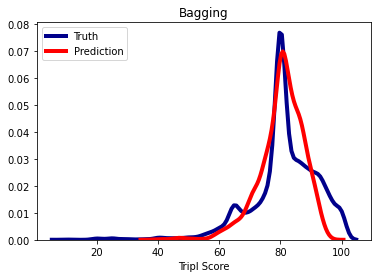

<ipython-input-69-1022a7d8e28d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


--------- Model :  Extra Trees  ---------------

6.941835259948233
Mean Absolute Error (MAE): 6.941835259948233
Mean Squared Error (MSE): 104.09105852959506
Root Mean Squared Error (RMSE): 10.202502562096962
---------------------------------------



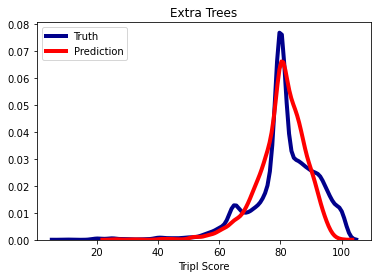

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


--------- Model :  AdaBoost  ---------------

8.059325000345373
Mean Absolute Error (MAE): 8.059325000345373
Mean Squared Error (MSE): 113.06560188294893
Root Mean Squared Error (RMSE): 10.633231018037224
---------------------------------------



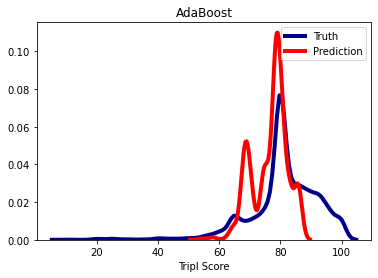

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


--------- Model :  Gradient Boost  ---------------

6.165569245744148
Mean Absolute Error (MAE): 6.165569245744148
Mean Squared Error (MSE): 84.7031512490289
Root Mean Squared Error (RMSE): 9.203431493145853
---------------------------------------



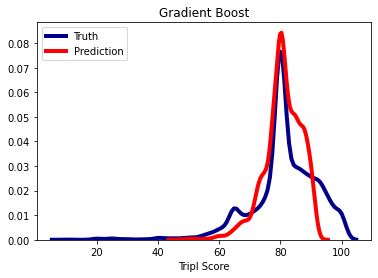

In [69]:
regressor_list,regressor_name_list = models()
for regressor,regressor_name in zip(regressor_list,regressor_name_list):
    regressor.fit(X_train,y_train)
    print_evaluation_metrics(regressor,regressor_name,X_test,y_test)  